# Shapely Basics

## 0 Imports

The following packages will be needed for this notebook.

In [1]:
# Imports:
from shapely.geometry import Point, LineString, box, LinearRing, Polygon, MultiPoint, MultiLineString, MultiPolygon, GeometryCollection
from matplotlib import pyplot as plt

## 1 Introduction

In this notebook you will learn about the python package "shapely" which we will use to save and process geometries during this labcourse. The geometries which are discussed in the following correspond to the geometries you already know from the theory part: Points, Lines and Polygons.

The shapely documentation can be found here: https://shapely.readthedocs.io/en/stable/manual.html
This notebook will introduce you to the most important shapely concepts, all of which can also be looked up in the documentation. For deeper insights and further information please also refer to the documentation. 

The remainder of this notebook is structured as follows: Section 2 deals with the basic geometry objects in shapely, namely points, linestrings, linear rings and polygons. Section 3 introduces the concept of collections, which are used to store multiple basic geometries in one data structure. In Section 4, an excursus into the general visualization of shapely objects is presented. Section 5 gives an overview over the general attributes of shapely objects. The sixth Section finally presents basic operations that can be executed on shapely geometries. 

## 2 Simple Geometry Objects

### 2.1 Point

The simplest geometric object in shapely is the Point object. Points are defined by their coordinates in space. In shapely, points can have up to three spatial components (x,y,z). However, during this labcourse we will only deal with two coodinate points (x,y). 

Let's start by creating three example points:

In [2]:
a = Point(0,0)

# Please also create points b (1,0) and c(1,5)!

#<<solution>>
b = Point(1,0)
c = Point(1,5)
#<</solution>>

We can now access the point coordinates using the x and y property of the Point object:

In [3]:
print("Coordinates of Point A: ({x}/{y})".format(x=a.x, y=a.y))
print("Coordinates of Point B: ({x}/{y})".format(x=b.x, y=b.y))
print("Coordinates of Point C: ({x}/{y})".format(x=c.x, y=c.y))

Coordinates of Point A: (0.0/0.0)
Coordinates of Point B: (1.0/0.0)
Coordinates of Point C: (1.0/5.0)


Be aware that shapely does not know anything about units. This means, for real-life applications you have to keep track of units yourself. To shapely, all coordinates are just plain floats:

In [4]:
type(a.x)

float

The xy property of the Point object gives us a 2-tuple of arrays. One containing the x-coordinates and one containing the y-coordinates. In the case of a Point, we always find one x-coordinate and one y-coordinate. For more complex geometries like linestrings, these arrays will contain multiple coordinates as you will see later. 

In [5]:
coordinates_c = c.xy

print(type(coordinates_c)) # The xy property contains a 2-tuple 
print(type(coordinates_c[0])) # ... of coordinate arrays
print(coordinates_c[0][0]) #  ... containing the x 
print(coordinates_c[1][0]) #  ... and y coordinates
print(type(coordinates_c[0][0])) #  ... as floats

<class 'tuple'>
<class 'array.array'>
1.0
5.0
<class 'float'>


It is very convinient and 'pythonic' to use value unpacking on such a tuple of coordinate-arrays to extract the x and y coordinates as separate arrays when passing them to a function. We will use this to plot our geometric objects!

Text(0,0.5,'y')

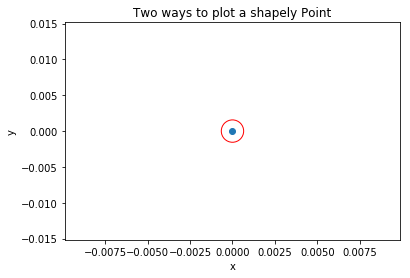

In [6]:
plt.scatter(*a.xy) # This is the same as:
plt.scatter(a.x, a.y, color='red', marker='o', s=500, facecolors='none')

# Completing the plot
plt.title("Two ways to plot a shapely Point")
plt.xlabel("x")
plt.ylabel("y")

Note that you can retrieve a well-known text representation from any shapely object:

In [7]:
a.wkt

'POINT (0 0)'

Let's have a look at the points we created above:

Text(0,0.5,'y')

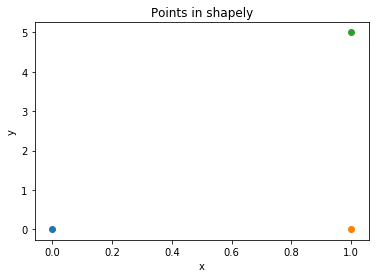

In [8]:
plt.scatter(*a.xy)
plt.scatter(*b.xy)
plt.scatter(*c.xy)

# Completing the plot
plt.title("Points in shapely")
plt.xlabel("x")
plt.ylabel("y")

### 2.2 LineString

In the theory section corresponding to this notebook we discussed the basic geometric elements that are needed in Geo-Data Analysis. Apart from points, we agreed that we also need lines. General lines are called linestrings in shapely. They are represented by a LineString object, that can be generated using a list of Point objects. Use the LineString class from the shapely documentation to create a LineString object from points a, b, and c!

In [9]:
# Create a LineString object from a list of Points a, b, and c!

#<<solution>>
linestring = LineString([a,b,c])
#<</solution>>

Plot the newly created linestring using pyplot's plot function and value unpacking.

Text(0,0.5,'y')

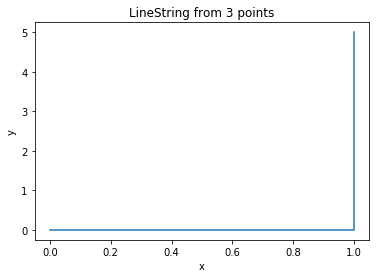

In [10]:
# Use this codebox to plot your linestring
#<<solution>>
plt.plot(*linestring.xy)

# Completing the plot
plt.title("LineString from 3 points")
plt.xlabel("x")
plt.ylabel("y")
#<</solution>>

### 2.3 LinearRing

Oftentimes, a closed set of lines is needed, e.g. when working with contours of geometric objects in a map like the outline of buildings or bodies of water. For closed contours, shapely uses LinearRing objects. The only difference between linear rings and linestrings is that linear rings are always closed! All operations that work with line strings also work with linear rings. 

Unfortunately linear rings can not be generated from points directly. Linear rings have to be created using coordinate lists providing coordinate tuples ([(x1, y1), (x1, y2)...]). These can be derived from nodes. 

In [11]:
point_list = [a, b, c] # A list containing the points that were created above
coordinate_list = [(pt.x, pt.y) for pt in point_list]

If a LinearRing is initialized using a non closed set of coordinates, the first coordinate tuple will be assumed to also be the last coordinate tuple, hence, closing the LinearRing implicitly. 
A LinearRing can also be closed explicitely, providing a set of coordinate tuples where the first tuple equals the last tuple.

In [12]:
# Implicitly closed
linear_ring_imp = LinearRing(coordinate_list)

# Explicitly closed
linear_ring_exp = LinearRing(coordinate_list+[(a.x, a.y)])

It is easy to show that both implicitly and explicity closed linear rings are equal to one another. Hence, we only keep one copy and name it linear_ring

In [13]:
# Are these the same?
if linear_ring_exp == linear_ring_imp:
    linear_ring = linear_ring_imp
    del linear_ring_exp
    del linear_ring_imp
    print("There is NO difference between the explicit closing and the implicit closing of LinearRings")
else:
    # This should never happen
    print("There is a difference between the explicit closing and the implicit closing of LinearRings")

There is NO difference between the explicit closing and the implicit closing of LinearRings


Text(0,0.5,'y')

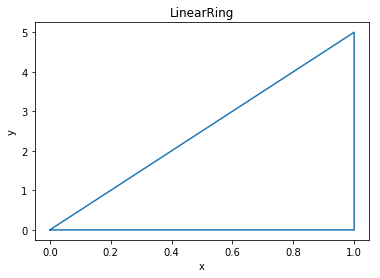

In [14]:
plt.plot(*linear_ring.xy)

# Completing the plot
plt.title("LinearRing")
plt.xlabel("x")
plt.ylabel("y")

### 2.4 Polygon

The third basic geometric object needed for Geo-Data Analysis is the polygon. A polygon represents an arbitrarily shaped area. 

There are two ways to construct a polygon from the geometric objects introduced before. One is to construct a polygon using a closed contour, namely a LinearRing. The other is to provide a list of coordinates containing the edges of the polygon:

In [15]:
# Please create a Polygon object from the LinearRing object "linear_ring" and name it "polygon_from_ring"
# polygon_from_ring = ...

#<<solution>>
polygon_from_ring = Polygon(linear_ring)
#<</solution>>

# Let's also build a polygon from a list of coordinates
polygon_from_coordinates = Polygon(coordinate_list)

Again, we can show that there is no difference between the two ways to create a polygon.

In [16]:
# Are these identical?
if polygon_from_ring == polygon_from_coordinates:
    print("There is NO difference between the ways to create a Polygon")
    polygon = polygon_from_ring
else:
    # This should never happen
    print("There is a difference between the ways to create a Polygon")

There is NO difference between the ways to create a Polygon


Under the hood, shapely distinguishes between points, curves and surfaces. Points are points, LinearStrings and LinearRings are curves and polygons are surfaces. Polygons are defined by the points marking their outline. However, the corresponding coordinates can not be retrieved by the .xy property. Instead, each type of polygon has an .exterior property which is a LinearRing, no matter how it was created. This in turn (we have seen it above) can be used to retrieve coordinates of the outlines via a .xy property. 

Hence, to plot a surface-type object, we have to use the following workaround:

Text(0,0.5,'y')

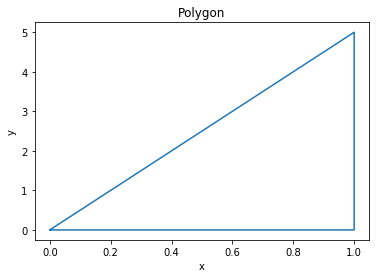

In [17]:
plt.plot(*polygon.exterior.xy)

# Completing the plot
plt.title("Polygon")
plt.xlabel("x")
plt.ylabel("y")

### 2.5 Box

The box is a special polygon which has exactly four edges. The box object in shapely is used to easily create such a box without providing all four coordinate tuples. Instead, just four coordinates have to be supplied: the minimal x coordinate, the minimal y coordinate, the maximal x coordinate and the maximal y coordinate. 
Through these coordinates a box is uniquely defined. 

In [18]:
minx, miny, maxx, maxy = 0,1,4,4

box_ = box(minx, miny, maxx, maxy) # Name the box "box_" to prevent confusion with the function itself

Since boxes are polygons, they are plotted just like polygons. Use your knowledge from the polygon case to plot the exterior of the box using pyplot!

Text(0,0.5,'y')

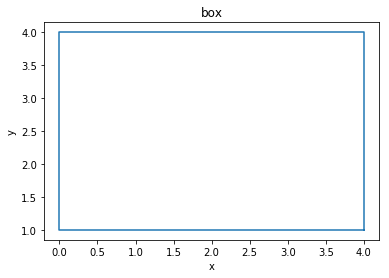

In [19]:
# Plot the box here

#<<solution>>
plt.plot(*box_.exterior.xy)

# Completing the plot
plt.title("box")
plt.xlabel("x")
plt.ylabel("y")
#<</solution>>

## 3 Collections

It is sometimes beneficial, to store multiple basic geometries in a common data structure. Collections can be used to bundle geometries of the same type (MultiPoint, MultiLineString, MultiPolygon) or of different types (GeometryCollection). Collections are generally created by passing a list of basic geometries to the corresponding multi-object.

### 3.1 MultiPoint

In [20]:
# Let's create a MultiPoint from a list of points
multi_point = MultiPoint([a,b,c])

# Accessing elements in Collections is easy
point_from_multipoint = multi_point[0]
print(point_from_multipoint.wkt)

POINT (0 0)


Text(0,0.5,'y')

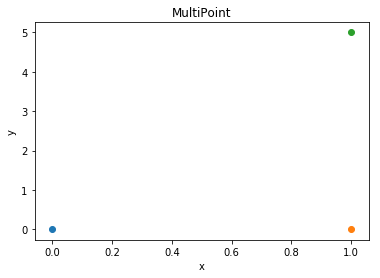

In [21]:
for point in multi_point:
    plt.scatter(*point.xy)
    
# Completing the plot
plt.title("MultiPoint")
plt.xlabel("x")
plt.ylabel("y")

### 3.2 MultiLineString

In [22]:
# Also for LineStrings
multi_linestring = MultiLineString([LineString([(0,0), (0,5)]), LineString([(3,0), (3,5)])])
# Note: This also works for linear rings

# Accessing elements works just like in the MultiPoint case

Text(0,0.5,'y')

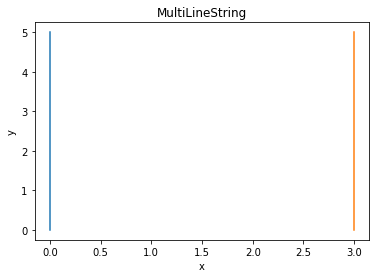

In [23]:
for ls in multi_linestring:
    plt.plot(*ls.xy)
    
# Completing the plot
plt.title("MultiLineString")
plt.xlabel("x")
plt.ylabel("y")

### 3.3 MultiPolygon

With your knowledge from the MuliPoint and the MultiLineString example, create a MultiPolygon from the "polygon" and the "box_" and store it in a variable called "multi_polygon"

In [24]:
# Create a MultiPolygon from polygon and box_ and name it multi_polygon
# multi_polygon = ....

#<<solution>>
# This works analogously
multi_polygon = MultiPolygon([polygon, box_])
#<</solution>>

Text(0,0.5,'y')

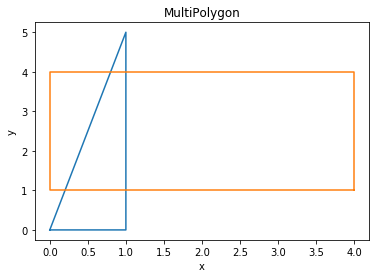

In [25]:
for mp in multi_polygon: 
    plt.plot(*mp.exterior.xy)
    
# Completing the plot
plt.title("MultiPolygon")
plt.xlabel("x")
plt.ylabel("y")

### 3.4 GeometryCollection

GeometryCollection objects are used to store shapely geometries of different types. They are initialized by a list of shapely geometry objects just like the other MultiObjects you already know about. 

In [26]:
# But what if we want to store  different geometries in one data structure?
geometry_collection = GeometryCollection([a, linestring, linear_ring, polygon, multi_point, multi_linestring, multi_polygon])

# Let's see what it contains:
print(geometry_collection)

GEOMETRYCOLLECTION (POINT (0 0), LINESTRING (0 0, 1 0, 1 5), LINEARRING (0 0, 1 0, 1 5, 0 0), POLYGON ((0 0, 1 0, 1 5, 0 0)), MULTIPOINT (0 0, 1 0, 1 5), MULTILINESTRING ((0 0, 0 5), (3 0, 3 5)), MULTIPOLYGON (((0 0, 1 0, 1 5, 0 0)), ((4 1, 4 4, 0 4, 0 1, 4 1))))


Text(0,0.5,'y')

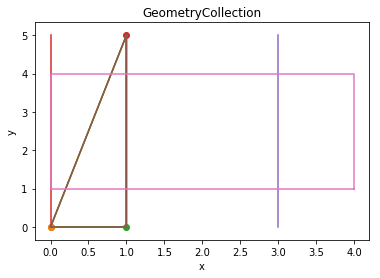

In [27]:
for geom in geometry_collection:
    if type(geom) == Point:
        plt.scatter(*geom.xy)
    elif type(geom) == LineString or type(geom) == LinearRing:
        plt.plot(*geom.xy)
    elif type(geom) == MultiPolygon:
        for p in geom:
            plt.plot(*p.exterior.xy)
    elif type(geom) == MultiPoint:
        for p in geom:
            plt.scatter(*p.xy)
    elif type(geom) == MultiLineString:
        for ls in geom:
            plt.plot(*ls.xy)
    else:    
        plt.plot(*geom.exterior.xy)
        
# Completing the plot
plt.title("GeometryCollection")
plt.xlabel("x")
plt.ylabel("y")

## 4 General Visualization

In this section, a universal plot function for shapely geometries is defined, in order to alleviate the effort needed to plot an arbitrary shapely object. The concrete implementation is just for the interested reader. If you decide to skip this section, just remember that you can use a function plot_shp that you pass an arbitrary shapely object and matplotlib \*args and \*\*kwargs in the remainder of this notebook 

In [28]:
# Plot a Point
def plot_pt(pt, *args, **kwargs):
    plt.scatter(*pt.xy, *args, **kwargs)

# Plot a LineString
def plot_ls(ls, *args, **kwargs):
    plt.plot(*ls.xy, *args, **kwargs)

# Plot a LinearRing
def plot_lr(lr, *args, **kwargs):
    plot_ls(lr, *args, **kwargs)
    
# Plot a Polygon
def plot_poly(poly, *args, **kwargs):
    plt.plot(*poly.exterior.xy, *args, **kwargs)
    
# Plot a MultiPoint
def plot_mpt(mpt, *args, **kwargs):
    for pt in mpt:
        plot_pt(pt, *args, **kwargs)
        
# Plot a MultiLineString
def plot_mls(mls, *args, **kwargs):
    for ls in mls:
        plot_ls(ls, *args, **kwargs)
        
# Plot a MultiPolygon
def plot_mpoly(mpoly, *args, **kwargs):
    for poly in mpoly:
        plot_poly(poly, *args, **kwargs)
    
# Plot a GeometryCollection
def plot_gc(gc, *args, **kwargs):
    for geom in gc:
        if type(geom) == Point:
            plot_pt(geom, *args, **kwargs)
        elif type(geom) == LineString or type(geom) == LinearRing:
            plot_ls(geom, *args, **kwargs)
        elif type(geom) == Polygon:
            plot_poly(geom, *args, **kwargs)
        elif type(geom) == MultiPolygon:
            plot_mpoly(geom, *args, **kwargs)
        elif type(geom) == MultiPoint:
            plot_mpt(geom, *args, **kwargs)
        elif type(geom) == MultiLineString:
            plot_mls(geom, *args, **kwargs)
        elif type(geom) == GeometryCollection:
            plot_gc(geom, *args, **kwargs)
        else:    
            raise Exception("Unknown geometry type in GeometryCollection! Can't plot")
            
def plot_shp(geom, *args, **kwargs):
    if type(geom) == Point:
        plot_pt(geom, *args, **kwargs)
    elif type(geom) in [LineString, LinearRing]:
        plot_ls(geom, *args, **kwargs)
    elif type(geom) in [Polygon, box]:
        plot_poly(geom, *args, **kwargs)
    elif type(geom) == MultiLineString:
        plot_mls(geom, *args, **kwargs)
    elif type(geom) == MultiPoint:
        plot_mpt(geom, *args, **kwargs)
    elif type(geom) == MultiPolygon:
        plot_mpoly(geom, *args, **kwargs)
    elif type(geom) == GeometryCollection:
        plot_gc(geom, *args, **kwargs)
    else:
        raise Exception("Unknown geometry type! Can't plot")

Let's test our new function! Use a geometry_collection object for testing, because it makes use of all the subfunctions!

Text(0,0.5,'y')

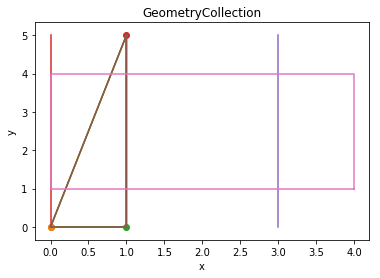

In [29]:
plot_shp(geometry_collection)

# Completing the plot
plt.title("GeometryCollection")
plt.xlabel("x")
plt.ylabel("y")

## 5 Attributes of Geometry Objects

All geometric objects and multi-objects known from above share a set of common properties that are automatically determined on object creation. They can later be accessed to characterize the stored geometry. The interested reader is referred to the shapely documentation for a comprehensive list of available properties. In this introduction however, four basic attributes shall be investigated: 

- geom_type: Carries information on the geometry type of the object. Possible values are: Point, LineString, LinearRing, Polygon, MultiPoint, MultiLineString, MultiPolygon and GeometriyCollection

- area: The area covered by the geometric object as a float. Remember that the unit of this area depends on the unit of the underlying coordinates that is not managed by shapely itself. Therefore, you have to interpret this property. 

- bounds: Coordinates of a box, containing all objects stored in the geometry.

- length: The length of the outline of the geometry. 

To conviniently demonstrate characteristic values of these properties for the different geom_types we define a function that prints the values of the properties:

In [30]:
# Each geometric object in shapely has some basic attributes one can access
def print_basic_attr(geom_obj):
    
    headline = "+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:"
    lb = "\n" # A linebreak
    geom_type = "Geometry Type: {}".format(geom_obj.geom_type)
    area = "Area: {}".format(geom_obj.area)
    bounds = "Bounds: {}".format(geom_obj.bounds)
    length = "Length {}".format(geom_obj.length)
    
    print(headline+lb+geom_type+lb+area+lb+bounds+lb+length+lb)
    

In [31]:
# Let's have a look at the attributes of the shapes we just created

# Points
print_basic_attr(a)

# LineString
print_basic_attr(linestring)

# LinearRing
print_basic_attr(linear_ring)

# Polygon
print_basic_attr(polygon)

# Multipoint
print_basic_attr(multi_point)

# MultiLineString
print_basic_attr(multi_linestring)

# MultiPolygon
print_basic_attr(multi_polygon)

# GeometryCollection
print_basic_attr(geometry_collection)

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: Point
Area: 0.0
Bounds: (0.0, 0.0, 0.0, 0.0)
Length 0.0

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: LineString
Area: 0.0
Bounds: (0.0, 0.0, 1.0, 5.0)
Length 6.0

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: LinearRing
Area: 0.0
Bounds: (0.0, 0.0, 1.0, 5.0)
Length 11.099019513592784

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: Polygon
Area: 2.5
Bounds: (0.0, 0.0, 1.0, 5.0)
Length 11.099019513592784

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: MultiPoint
Area: 0.0
Bounds: (0.0, 0.0, 1.0, 5.0)
Length 0.0

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: MultiLineString
Area: 0.0
Bounds: (0.0, 0.0, 3.0, 5.0)
Length 10.0

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: MultiPolygon
Area: 14.5
Bounds: (0.0, 0.0, 4.0, 5.0)
Length 25.099019513592786

+++ ATTRIBUTES OF A GEOMETRY OBJECT +++:
Geometry Type: GeometryCollection
Area: 17.0
Bounds: (0.0, 0.0, 4.0, 5.0)
Length 63.297

## 6 Operations on Geometry Objects

In the previous sections you learned about the initialization and plotting of shapely objects. Therefore, you are now able to create, store and visualize such objects. For data analysis however, more complex operations are needed in order to interpret and process geometric data. This section deals with the operations that can be carried out on shapely geometries. Most of the presented operations often occur in said data analyses and are therefore most important for the remainder of this labcourse. 

This section is split in two subsections: Section 6.1 deals with relative operations, that is, operations that use multiple shapely objects to compare, analyze or process them with regards to their properties. Section 6.2 then introduces generative operations that can be used to derive new geometries from existing ones. 

### 6.1 Relative Operations

In this subsection, five relative operations between shapely objects are presented: within and contains (6.1.1), intersection (6.1.2), union (6.1.3) and symmetric_difference (6.1.4).

#### 6.1.1 within and contains

With the help of relative operations, basic questions about the location and properties of shapely objects can be answered. We can for example check if points are located within areas. Or, vice versa, whether areas contain points:

In [32]:
# Let's create additional points
d = Point(2,2)
e = Point(0.75, 1.5)

# Are d or e within the box?

print("d is within the box: {}".format(d.within(box_)))
print("e is within the box: {}".format(d.within(box_)))

# Are d or e within the polygon?

print("d is within the polygon: {}".format(d.within(polygon)))
print("e is within the polygon: {}".format(e.within(polygon)))

d is within the box: True
e is within the box: True
d is within the polygon: False
e is within the polygon: True


We can check the results by visualizing the underlying geometry.

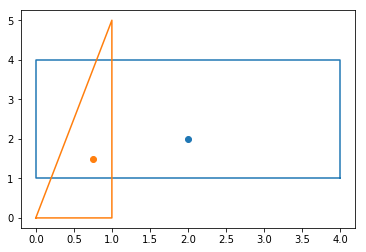

In [33]:
plot_shp(GeometryCollection([d,e,box_,polygon]))

The same result can be obtained vice versa. Use the contains function to determine whether: 

    - The box contains d
    - The box contains e
    - The polygon contains d
    - The polygon contains e
    
And print your result.

In [34]:
# Print the truth values of the propositions defined in the text box above! Use the contains function!

#<<solution>>
# Which objects does the box contain?
print("The box contains d: {}".format(box_.contains(d)))
print("The box contains e: {}".format(box_.contains(e)))

# Which objects does the polygon contain?
print("The polygon contains d: {}".format(polygon.contains(d)))
print("The polygon contains e: {}".format(polygon.contains(e)))
#<</solution>>

The box contains d: True
The box contains e: True
The polygon contains d: False
The polygon contains e: True


#### 6.1.2 intersection

Text(0,0.5,'y')

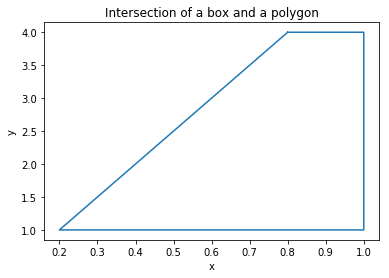

In [35]:
# Where do the box and the polygon intersect?
intersection_box_polygon = box_.intersection(polygon)

plot_shp(intersection_box_polygon)

# Completing the plot
plt.title("Intersection of a box and a polygon")
plt.xlabel("x")
plt.ylabel("y")

#### 6.1.3 union

Text(0,0.5,'y')

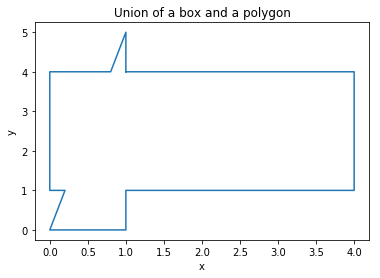

In [36]:
# Union the box and the polygon
union_box_polygon = box_.union(polygon)
plot_shp(union_box_polygon)

# Completing the plot
plt.title("Union of a box and a polygon")
plt.xlabel("x")
plt.ylabel("y")

#### 6.1.4 symmetric_difference

Text(0,0.5,'y')

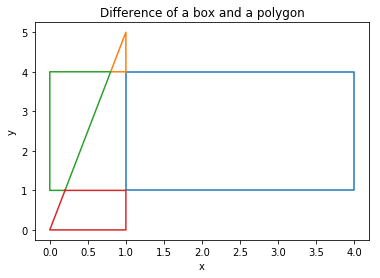

In [37]:
# Get everything that is not in the union of the box this may create a MultiPolygon!
difference_box_polygon = box_.symmetric_difference(polygon)

plot_shp(difference_box_polygon)

# Completing the plot
plt.title("Difference of a box and a polygon")
plt.xlabel("x")
plt.ylabel("y")

### 6.2 Constructive Operations

Constructive operations are used to derive new geometry from existing geometries, that are not subsets if the input geometries. The following subsections will introduce three constructive operations: envelope (6.2.1),  buffer (6.2.2) and convex_hull (6.2.3).

#### 6.2.1 envelope

The envelope of a geometric object is the smallest rectangular polygon that contains the object.

Text(0,0.5,'y')

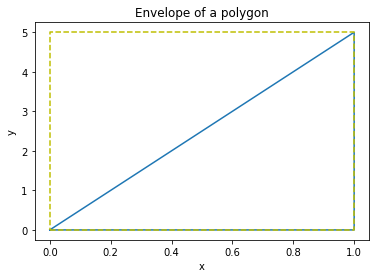

In [38]:
# Find the smallest rectangular polygon, that contains the object
polygon_envelope = polygon.envelope
plot_shp(polygon)
plot_shp(polygon_envelope, 'y--')

# Completing the plot
plt.title("Envelope of a polygon")
plt.xlabel("x")
plt.ylabel("y")

Text(0,0.5,'y')

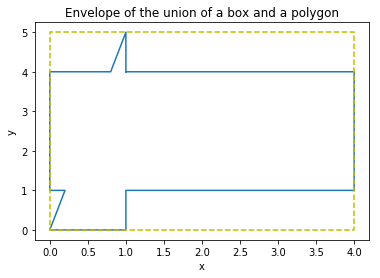

In [39]:
# Find the smallest rectangular polygon, that contains the object
union_box_polygon_envelope = union_box_polygon.envelope
plot_shp(union_box_polygon)
plot_shp(union_box_polygon_envelope, 'y--')

# Completing the plot
plt.title("Envelope of the union of a box and a polygon")
plt.xlabel("x")
plt.ylabel("y")

#### 6.2.2 buffer

The buffer operation approximates a polygon containing all points within the specified distance from the original geometry. Hence, we can use the buffer operation to create circles from points or up- and downscale existing geometries.

Text(0,0.5,'y')

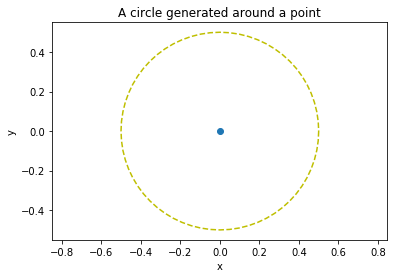

In [40]:
# Lets approximate a circle around a Point
circle = a.buffer(0.5)
plot_shp(circle, 'y--')
plot_shp(a)
plt.axis('equal')

# Completing the plot
plt.title("A circle generated around a point")
plt.xlabel("x")
plt.ylabel("y")

(-0.31, 4.31, -0.3599999992219337, 5.359999983660607)

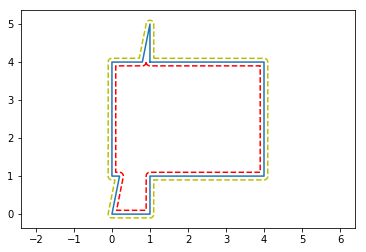

In [41]:
plot_shp(union_box_polygon) # Normal geometry
plot_shp(union_box_polygon.buffer(0.1), 'y--') # Upscaled geometry
plot_shp(union_box_polygon.buffer(-0.1), 'r--') # Shrunk geometry
plt.axis('equal')

#### 6.2.3 convex_hull

The convex_hull operation is used to generate the smallest convex polygon that contains all elements of the base geometry. 

Text(0,0.5,'y')

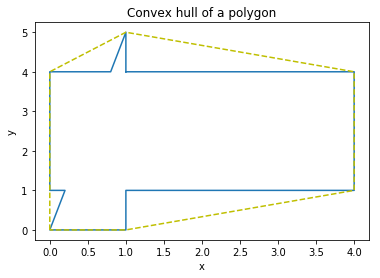

In [42]:
# find the smallest convex hull that contains all points of the box_polygon union
convex_hull_box_polygon = union_box_polygon.convex_hull
plot_shp(union_box_polygon)
plot_shp(convex_hull_box_polygon, 'y--')

# Completing the plot
plt.title("Convex hull of a polygon")
plt.xlabel("x")
plt.ylabel("y")